In [ ]:
# !pip install ultralytics
# !pip install roboflow
# !pip install easyocr

In [6]:
!git clone https://github.com/abewley/sort.git

Cloning into 'sort'...


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from ultralytics import YOLO
import easyocr
from IPython.display import display, Image


In [2]:
model = YOLO('best.pt')

In [4]:
# from roboflow import Roboflow
# rf = Roboflow(api_key="BLcnvHKKuP2mEYtl4yQ3")
# project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
# version = project.version(6)
# dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to License-Plate-Recognition-6 in yolov8:: 100%|██████████| 20262/20262 [01:23<00:00, 243.95it/s]


In [4]:
os.getcwd()

'd:\\License plate Detection'

In [ ]:
# model.train(data='/content/License-Plate-Recognition-6/data.yaml', epochs=10,patience=8,save=True,optimizer='Adam',imgsz=640,save_period=2,device=0)

In [2]:
def get_points(result):
  li = []
  for box in result[0]:
    x1,y1,x2,y2 =  map(int,box.boxes.xyxy[0].tolist())
    temp = list()
    temp.append(x1)
    temp.append(y1)
    temp.append(x2)
    temp.append(y2)
    li.append(temp)
  return li
    

In [3]:
def license_text(reader,img):
  tt = reader.readtext(img)
  txt_list = list()
  for temp in tt:
    _,text,_ = temp
    txt_list.append(text)
  return  " ".join(txt_list).upper()

In [51]:
# result = model.predict(source="C:\\Users\\BS\\Desktop\\license_plate.mp4",conf=.5,save=True)


WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/140) C:\Users\BS\Desktop\license_plate.mp4: 384x640 1 License_Plate, 282.8ms
video 1/1 (frame 2/140) C:\Users\BS\Desktop\license_plate.mp4: 384x640 1 License_Plate, 134.0ms
video 1/1 (frame 3/140) C:\Users\BS\Desktop\license_plate.mp4: 384x640 1 License_Plate, 184.9ms
video 1/1 (frame 4/140) C:\Users\BS\Desktop\license_plate.mp4: 384x640 1 License_Plate, 170.0ms
video 1/1 (frame 5/140) C:\Users\BS\Desktop\license_plate.mp4: 384x640 1 Li

In [12]:

def vid_play(vid_link,model_weights):
    reader = easyocr.Reader(['en'])
    cap = cv2.VideoCapture(vid_link)
    model = YOLO(model_weights)
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    # Initialize VideoWriter to save output
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter('Model_video\\Model_output2.mp4', fourcc, fps, (frame_width, frame_height))
    while  cap.isOpened():
        ret,frame = cap.read()
        if not ret:
            break
        gray = cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)

        result=model.predict(source=frame,conf=.5)

        obj_list = get_points(result)
        
        for obj in obj_list:
            x1,y1,x2,y2=obj
            ff = gray[y1:y2,x1:x2]
            ff = cv2.resize(ff,(400,150))
            adaptive_image = cv2.adaptiveThreshold(ff,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,71,1)
            text = license_text(reader,adaptive_image)
            cv2.rectangle(frame,(x1,y1),(x2,y2),(225,0,0),2)
            org = (x1, y2 + 80)  # Position text below the box
            cv2.putText(frame, text, org, cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0), 5, cv2.LINE_AA)
        out.write(frame)
    cap.release()
    out.release()

vid_play('nr.mp4','best.pt')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.



0: 384x640 1 License_Plate, 298.0ms
Speed: 7.0ms preprocess, 298.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 License_Plate, 227.0ms
Speed: 7.0ms preprocess, 227.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 License_Plate, 231.0ms
Speed: 6.0ms preprocess, 231.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 License_Plate, 153.0ms
Speed: 4.0ms preprocess, 153.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 License_Plate, 208.0ms
Speed: 6.0ms preprocess, 208.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 License_Plate, 194.0ms
Speed: 6.0ms preprocess, 194.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 License_Plate, 174.0ms
Speed: 5.0ms preprocess, 174.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 License_Plate, 315.0ms
Speed: 4.0ms prepr

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.



0: 320x640 2 License_Plates, 136.0ms
Speed: 4.0ms preprocess, 136.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 640)


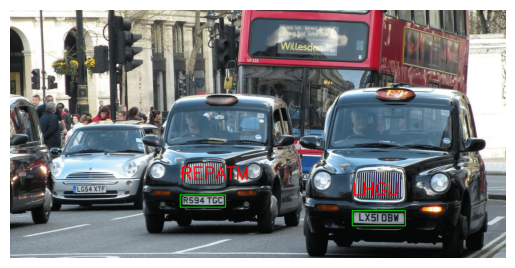

In [77]:
def img_play(img_link, model_weights):
    reader = easyocr.Reader(['en'])
    model = YOLO(model_weights)
    
    # Load and preprocess the image
    img = cv2.imread(img_link)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    result = model.predict(source=img, conf=0.5)

    h, w, _ = img.shape  # Get original image dimensions

    # Process each detected object
    obj_list = get_points(result)
    for obj in obj_list:
        x1, y1, x2, y2 = obj  # Bounding box coordinates

        # Extract the region of interest (ROI) from grayscale image
        ff = gray[y1:y2, x1:x2]
        ff = cv2.resize(ff,(300,300))
    
        # Adaptive threshold for OCR
        ff = cv2.GaussianBlur(ff, (5, 5), 0)

        adaptive_image = cv2.adaptiveThreshold(ff, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                               cv2.THRESH_BINARY, 61, 1)                  
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 225, 0), 3)
        text = license_text(reader, ff)
        org = (x1, y1 - 80)  # Position text below the box
        cv2.putText(img, text, org, cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0), 5, cv2.LINE_AA)

    # Display the final image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Run the function
img_play("ANPR-United-Kingdom-London-Number-Plate-Reader-System-scaled.webp",'best.pt')